# B_A3_Feature_Extraction

In [ ]:
pip install matplotlib

In [ ]:
pip install opencv-python


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

In [2]:
image_path = "123.jpg" # Replace with your image path
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [3]:
def plot_color_histogram(image):
    color = ('r', 'g', 'b')
    plt.figure(figsize=(12, 6))
    for i, col in enumerate(color):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(hist, color=col)
        plt.xlim([0, 256])
    plt.title('Color Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()

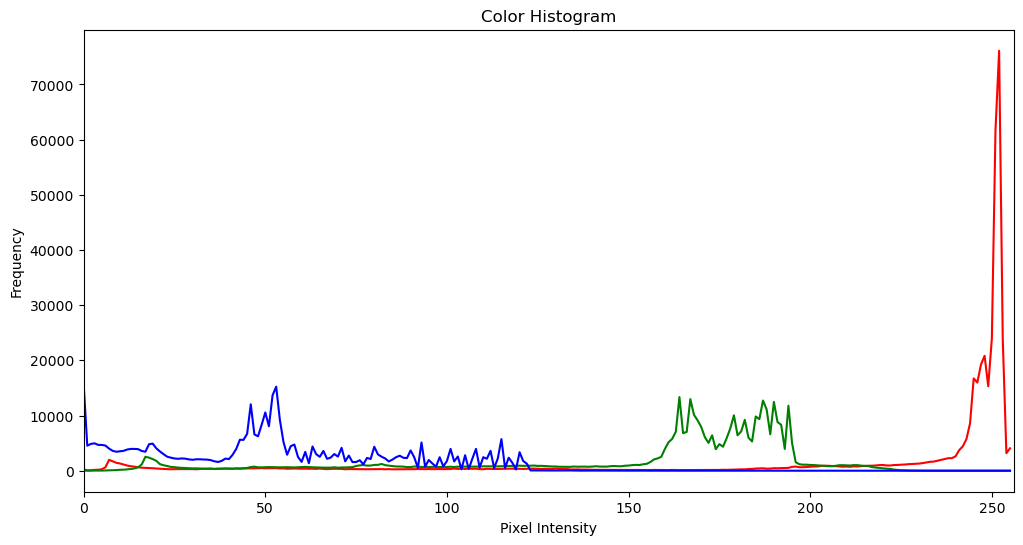

In [4]:
# Plot color histogram
plot_color_histogram(image_rgb)


In [5]:
def plot_glcm_texture_features(image):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Calculate GLCM
    glcm = greycomatrix(gray, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    
    # Extract texture features
    contrast = greycoprops(glcm, 'contrast')[0, 0]
    dissimilarity = greycoprops(glcm, 'dissimilarity')[0, 0]
    homogeneity = greycoprops(glcm, 'homogeneity')[0, 0]
    energy = greycoprops(glcm, 'energy')[0, 0]
    correlation = greycoprops(glcm, 'correlation')[0, 0]
    
    # Plot Texture Feature Values
    texture_features = [contrast, dissimilarity, homogeneity, energy, correlation]
    feature_names = ['Contrast', 'Dissimilarity', 'Homogeneity', 'Energy', 'Correlation']
    
    plt.figure(figsize=(12, 6))
    plt.bar(feature_names, texture_features, color='skyblue')
    plt.title('Texture Features using GLCM')
    plt.xlabel('Texture Feature')
    plt.ylabel('Value')
    plt.show()

In [ ]:
# Plot texture features
plot_glcm_texture_features(image)

In [ ]:
pip install Pillow


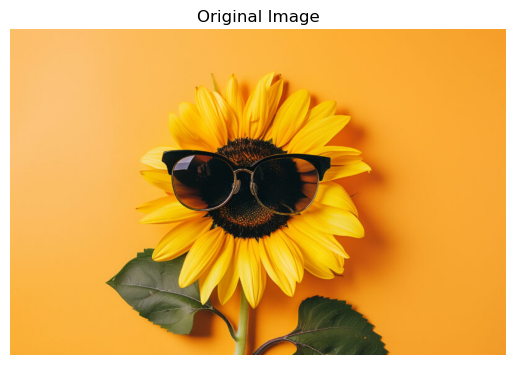

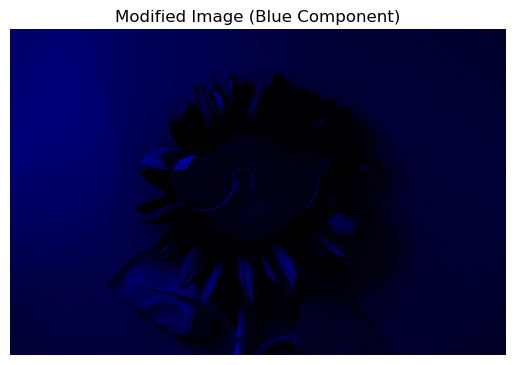

In [1]:
from PIL import Image
import os
import matplotlib.pyplot as plt

def color_to_rgb(alpha, red, green, blue):
    # Convert individual alpha, red, green, and blue components to a single integer representing the RGB value
    new_pixel = 0
    new_pixel += alpha
    new_pixel = (new_pixel << 8) + red
    new_pixel = (new_pixel << 8) + green
    new_pixel = (new_pixel << 8) + blue
    return new_pixel

def image_histogram(input_image):
    # Create a new image to store the modified version
    red_graph = Image.new('RGB', input_image.size)
    pixels = input_image.load()
    
    for i in range(input_image.width):
        for j in range(input_image.height):
            # Get the pixel's red, green, and blue components
            r, g, b = pixels[i, j]
            
            # Set the pixel in the new image, modifying it to keep only the blue component
            red_graph.putpixel((i, j), (0, 0, b))

    return red_graph

def write_image(output, image):
    # Save the modified image
    image.save(f"{output}.jpg")

def display_image(image, title):
    # Convert image to RGB for display and show using matplotlib
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')  # Hide the axis
    plt.show()

if __name__ == "__main__":
    # Load the original image
    image_path = "123.jpg"
    
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"Image file not found at {image_path}")
    
    original_image = Image.open(image_path)
    
    # Apply histogram extraction (modifying the blue component)
    answer_image = image_histogram(original_image)
    
    # Display the original and modified images
    display_image(original_image, "Original Image")
    display_image(answer_image, "Modified Image (Blue Component)")

    # Write the output image
    write_image("featureExtraction", answer_image)


In [ ]:
pip install pillow matplotlib numpy


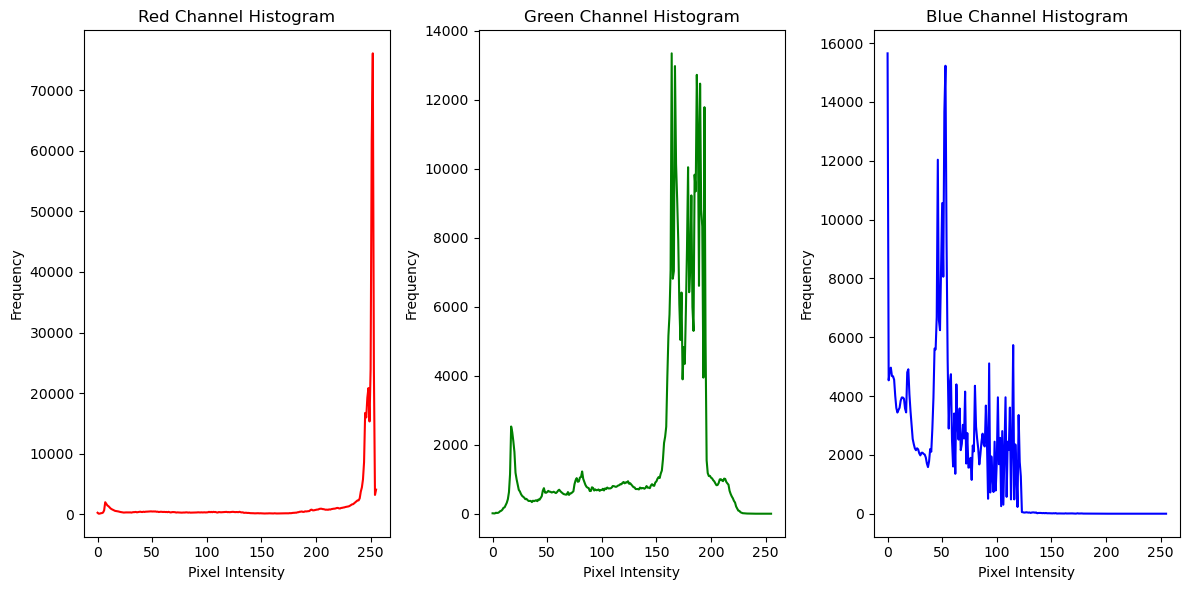

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

def extract_color_histogram(image):
    """
    Extracts and returns color histograms for R, G, B channels of the image.
    """
    # Convert image to numpy array for easier processing
    img_array = np.array(image)
    
    # Split the image into R, G, B channels
    red_channel = img_array[:, :, 0]
    green_channel = img_array[:, :, 1]
    blue_channel = img_array[:, :, 2]
    
    # Calculate histograms for each color channel
    red_hist = np.histogram(red_channel, bins=256, range=(0, 256))[0]
    green_hist = np.histogram(green_channel, bins=256, range=(0, 256))[0]
    blue_hist = np.histogram(blue_channel, bins=256, range=(0, 256))[0]
    
    return red_hist, green_hist, blue_hist

def plot_histogram(red_hist, green_hist, blue_hist):
    """
    Plots the histograms for R, G, B channels.
    """
    # Create a figure with three subplots, one for each channel
    plt.figure(figsize=(12, 6))
    
    # Plot Red Histogram
    plt.subplot(1, 3, 1)
    plt.plot(red_hist, color='red')
    plt.title('Red Channel Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    
    # Plot Green Histogram
    plt.subplot(1, 3, 2)
    plt.plot(green_hist, color='green')
    plt.title('Green Channel Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    
    # Plot Blue Histogram
    plt.subplot(1, 3, 3)
    plt.plot(blue_hist, color='blue')
    plt.title('Blue Channel Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    
    # Display the histograms
    plt.tight_layout()
    plt.show()

def main():
    # Load the original image
    image_path = "123.jpg"
    
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"Image file not found at {image_path}")
    
    original_image = Image.open(image_path)
    
    # Extract color histograms from the image
    red_hist, green_hist, blue_hist = extract_color_histogram(original_image)
    
    # Plot histograms for each color channel
    plot_histogram(red_hist, green_hist, blue_hist)
    
if __name__ == "__main__":
    main()


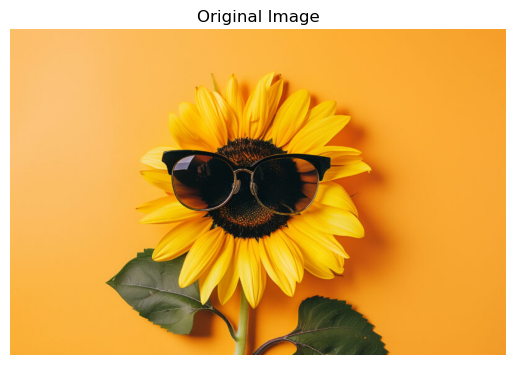

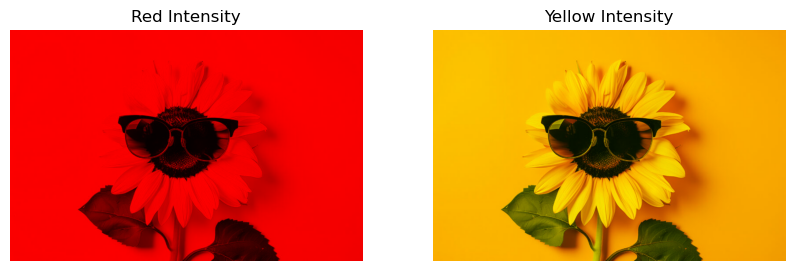

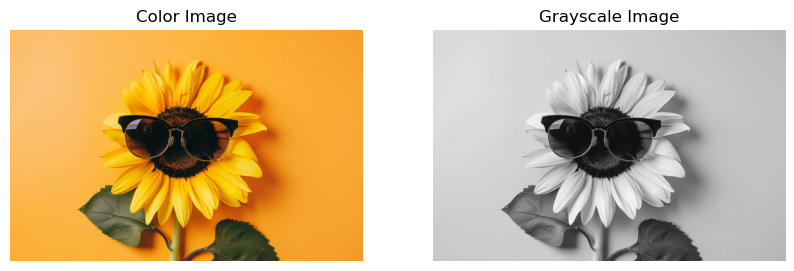

Colored image shape: (525, 800, 3)
Grayscale image shape: (525, 800)


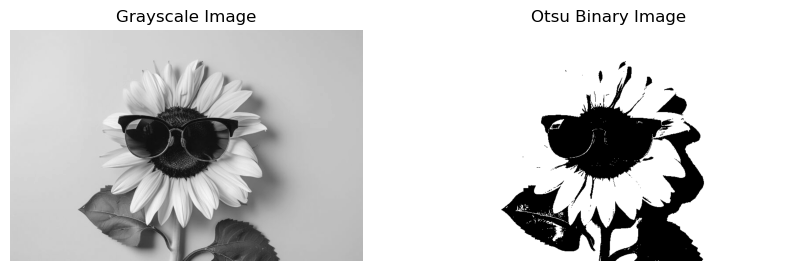

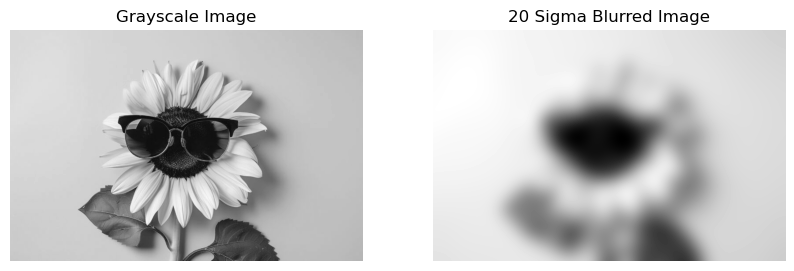

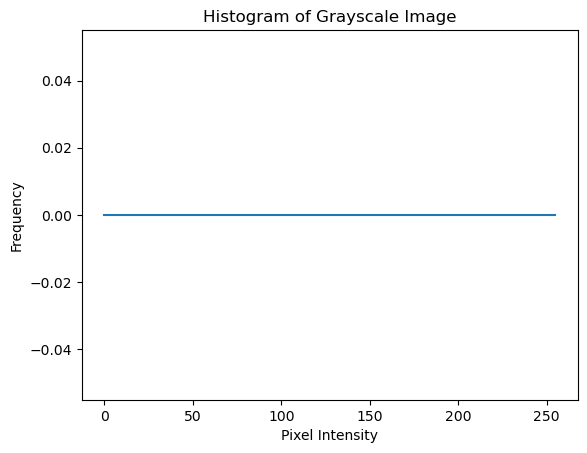

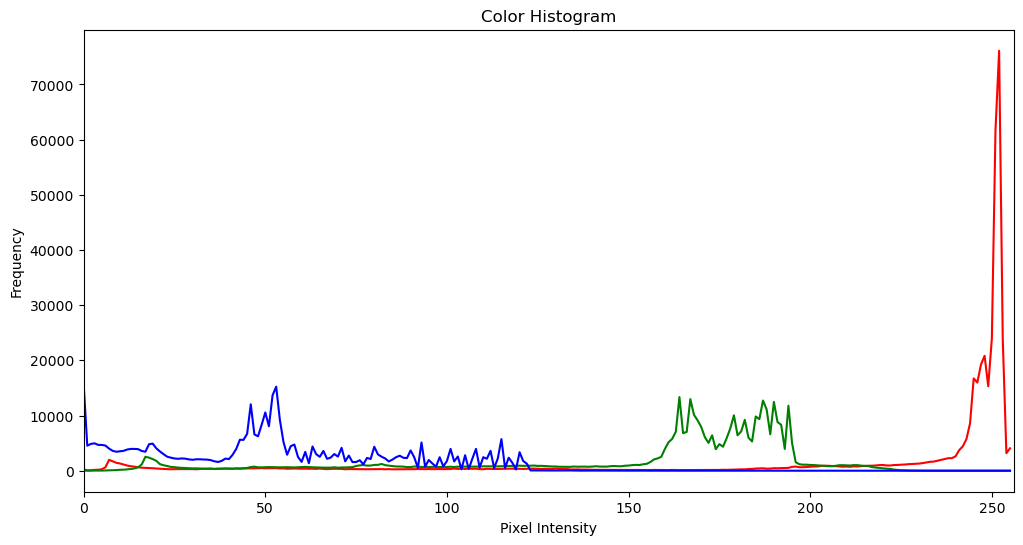

In [1]:
import matplotlib.pyplot as plt  # Importing matplotlib for image display and plotting
import cv2  # Importing OpenCV for image processing
from skimage.color import rgb2gray  # Importing function to convert image to grayscale
from skimage.filters import threshold_otsu, gaussian  # Importing Otsu thresholding and Gaussian filter
from skimage.io import imread  # Importing function to read images

# Load and display the original image
image = imread(r"C:\\Users\\asus\\Downloads\\suhail\\ISR LAb\\123.jpg")
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')
plt.show()

# Create red and yellow intensity images
red, yellow = image.copy(), image.copy()

# Set green and blue channels to 0 for red image
red[:, :, (1, 2)] = 0

# Set blue channel to 0 for yellow image (leaving only red and green)
yellow[:, :, 2] = 0

# Display red and yellow intensity images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(red)
axes[0].set_title("Red Intensity")
axes[0].axis('off')
axes[1].imshow(yellow)
axes[1].set_title("Yellow Intensity")
axes[1].axis('off')
plt.show()

# Convert the image to grayscale
gray_image = rgb2gray(image)

# Display the original and grayscale images side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image)
axes[0].set_title("Color Image")
axes[0].axis('off')
axes[1].imshow(gray_image, cmap='gray')
axes[1].set_title("Grayscale Image")
axes[1].axis('off')
plt.show()

# Print the dimensions of the images
print("Colored image shape:", image.shape)
print("Grayscale image shape:", gray_image.shape)

# Apply Otsu's thresholding to the grayscale image
thresh = threshold_otsu(gray_image)
binary_image = gray_image > thresh

# Display grayscale and binary (thresholded) images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(gray_image, cmap='gray')
axes[0].set_title("Grayscale Image")
axes[0].axis('off')
axes[1].imshow(binary_image, cmap='gray')
axes[1].set_title("Otsu Binary Image")
axes[1].axis('off')
plt.show()

# Apply Gaussian blur to the grayscale image
blurred_image = gaussian(gray_image, sigma=20)

# Display the grayscale image and the blurred image
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(gray_image, cmap='gray')
axes[0].set_title("Grayscale Image")
axes[0].axis('off')
axes[1].imshow(blurred_image, cmap='gray')
axes[1].set_title("20 Sigma Blurred Image")
axes[1].axis('off')
plt.show()

# Example: Reading and plotting histogram of an image using OpenCV and Matplotlib
img = cv2.imread('ex.jpg', 0)  # Load the image in grayscale

# Calculate the histogram for grayscale image (0-255 intensity levels)
histg = cv2.calcHist([img], [0], None, [256], [0, 256])

# Plot the histogram to analyze pixel intensity distribution
plt.plot(histg)
plt.title('Histogram of Grayscale Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

image_path = "123.jpg" # Replace with your image path
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def plot_color_histogram(image):
    color = ('r', 'g', 'b')
    plt.figure(figsize=(12, 6))
    for i, col in enumerate(color):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(hist, color=col)
        plt.xlim([0, 256])
    plt.title('Color Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()

# Plot color histogram
plot_color_histogram(image_rgb)

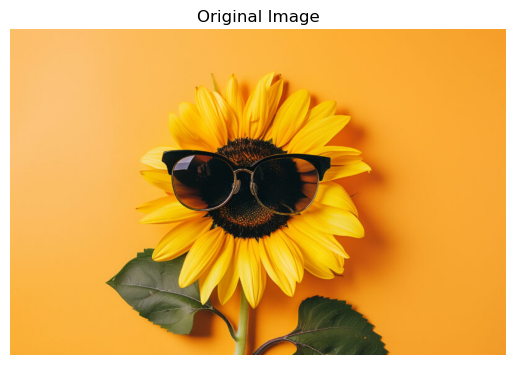

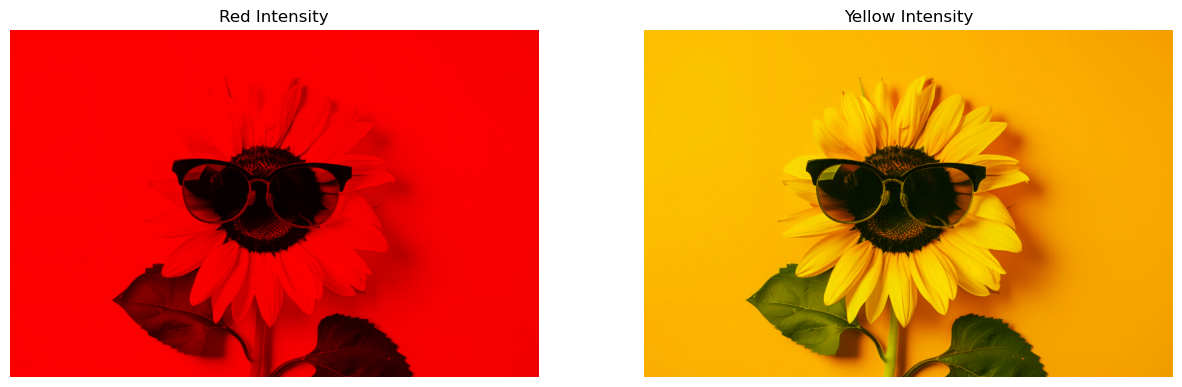

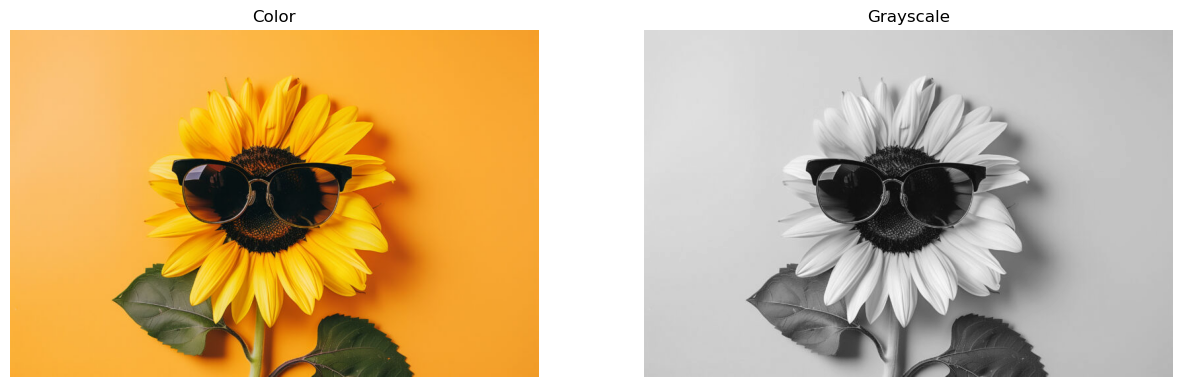

Colored image shape: (525, 800, 3)
Grayscale image shape: (525, 800)


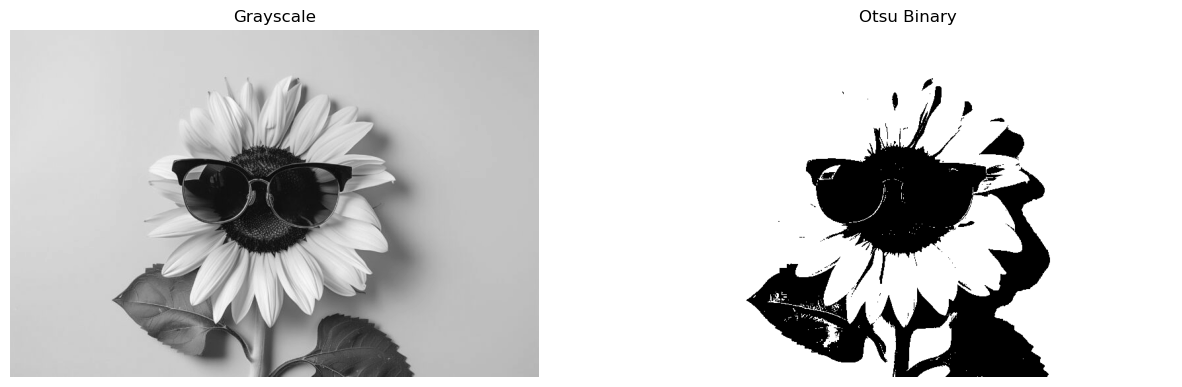

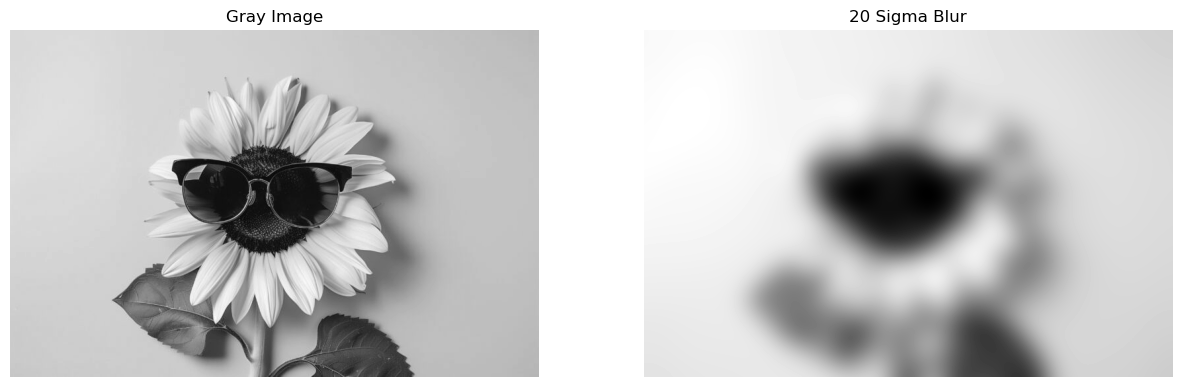

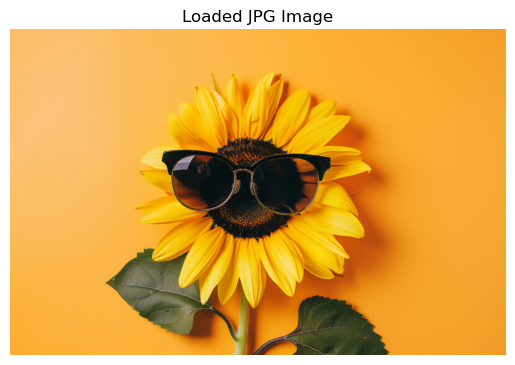

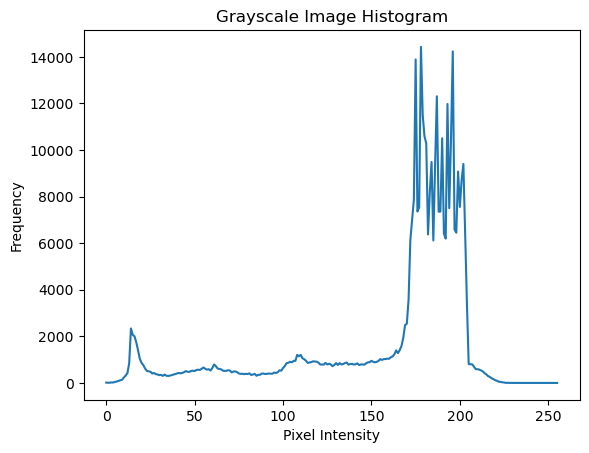

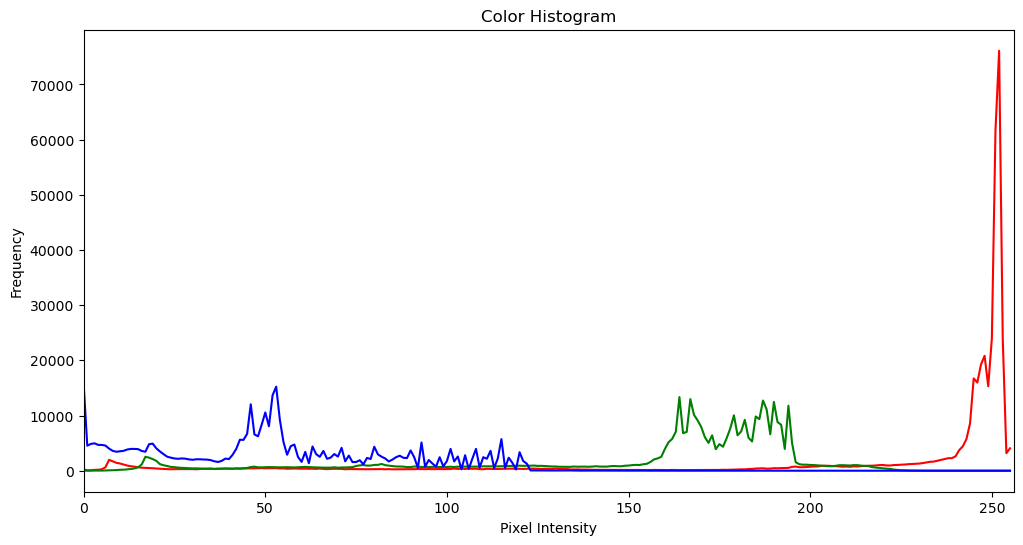

In [1]:
# Import necessary libraries
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu, gaussian
import matplotlib.pyplot as plt
import numpy as np

# Function to display a single image
def show_img(image, title="Image"):
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Function to display multiple images
def show_images(images, titles):
    n = len(images)
    fig, axes = plt.subplots(1, n, figsize=(15, 5))
    for i in range(n):
        ax = axes[i]
        ax.imshow(images[i], cmap='gray' if len(images[i].shape) == 2 else None)
        ax.set_title(titles[i])
        ax.axis('off')
    plt.show()

# Load the image
image = imread(r"C:\\Users\\asus\\Downloads\\suhail\\ISR LAb\\123.jpg")

# Display the original image
show_img(image, "Original Image")

# Create red and yellow channel images
red, yellow = image.copy(), image.copy()

# Remove green and blue channels for the red image
red[:, :, (1, 2)] = 0

# Remove blue channel for the yellow image
yellow[:, :, 2] = 0

# Show the red and yellow intensity images
show_images(images=[red, yellow], titles=['Red Intensity', 'Yellow Intensity'])

# Convert the original image to grayscale
gray_image = rgb2gray(image)

# Show the color and grayscale images
show_images(images=[image, gray_image], titles=["Color", "Grayscale"])

# Print image shape information
print("Colored image shape:", image.shape)
print("Grayscale image shape:", gray_image.shape)

# Apply Otsu's thresholding
thresh = threshold_otsu(gray_image)

# Create a binary image based on the threshold
binary_image = gray_image > thresh

# Display grayscale and Otsu binary images
show_images(images=[gray_image, binary_image], titles=["Grayscale", "Otsu Binary"])

# Apply Gaussian filter (blurring) to the grayscale image
blurred_image = gaussian(gray_image, sigma=20)

# Show the grayscale and blurred images
show_images(images=[gray_image, blurred_image], titles=["Gray Image", "20 Sigma Blur"])

# Now, let's use matplotlib to work with PNG images

# Importing matplotlib for image processing
import matplotlib.pyplot as plt

# Load an image in PNG format
img = plt.imread('C:\\Users\\asus\\Downloads\\suhail\\ISR LAb\\123.jpg')

# Display the loaded PNG image
plt.imshow(img)
plt.title('Loaded JPG Image')
plt.axis('off')
plt.show()

# Example: Using OpenCV to read and analyze an image
import cv2

# Load an image using OpenCV in grayscale mode
img_cv = cv2.imread('C:\\Users\\asus\\Downloads\\suhail\\ISR LAb\\123.jpg', 0)

# Calculate the frequency of pixel intensities (0-255) for the grayscale image
histg = cv2.calcHist([img_cv], [0], None, [256], [0, 256])

# Plotting the histogram using matplotlib
plt.plot(histg)
plt.title("Grayscale Image Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()


import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

image_path = "123.jpg" # Replace with your image path
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def plot_color_histogram(image):
    color = ('r', 'g', 'b')
    plt.figure(figsize=(12, 6))
    for i, col in enumerate(color):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(hist, color=col)
        plt.xlim([0, 256])
    plt.title('Color Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()

# Plot color histogram
plot_color_histogram(image_rgb)